# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [79]:
# Dependencies and Setup
!pip install citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from datetime import datetime
from datetime import date
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

636


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [68]:
# #test the url with parameters if it work for London and inspect the stucture of retrived data:
# url = (f"https://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={weather_api_key}")
# city = "London"
# response = requests.get(url).json()
# # print(response)
# print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 1
    },
    "cod": 200,
    "coord": {
        "lat": 18.3851,
        "lon": 42.4509
    },
    "dt": 1647744092,
    "id": 110690,
    "main": {
        "feels_like": 11.35,
        "grnd_level": 786,
        "humidity": 68,
        "pressure": 1015,
        "sea_level": 1015,
        "temp": 12.29,
        "temp_max": 13.06,
        "temp_min": 12.29
    },
    "name": "Faya",
    "sys": {
        "country": "SA",
        "id": 7396,
        "sunrise": 1647746073,
        "sunset": 1647789656,
        "type": 1
    },
    "timezone": 10800,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 194,
        "gust": 1.97,
        "speed": 1.7
    }
}


In [70]:
#Create lists to loopp through and store the data, you need: city, country, latitutde and longitiude, max_temp, humidity, cloudiness, wind speed, time and date
cities_all = []
city_ID = []
lat = []
lng =[]
country = []
max_temp =[]
humidity =[]
cloudiness = []
wind =[]
date = []

#set index to 1:
index = 1

#loop through the url to find each parameter^, add it to the above lists, use: 
for index, city in enumerate(cities):
    
#provide url with parameters:
    url = (f"https://api.openweathermap.org/data/2.5/weather?q={city}&units=metric&appid={weather_api_key}")
    
    response = requests.get(url).json()
  
#try ---> except in case the data was not found:
    try:
        cities_all.append(response['name'])
        city_ID.append(response['id'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        country.append(response['sys']['country'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        
        print(f'Processing Data: {index} city name: {city}')
        index = index + 1
   
    except:
        print(f'City "{city}" not found')
        pass

print('-----------------------------') 
print('Done')

Processing Data: 0 city name: albany
Processing Data: 1 city name: cherskiy
Processing Data: 2 city name: vardo
Processing Data: 3 city name: adrar
Processing Data: 4 city name: avarua
Processing Data: 5 city name: gizo
Processing Data: 6 city name: puerto madero
Processing Data: 7 city name: kapaa
Processing Data: 8 city name: east london
Processing Data: 9 city name: neepawa
Processing Data: 10 city name: dikson
Processing Data: 11 city name: rio grande
Processing Data: 12 city name: carnarvon
Processing Data: 13 city name: banjar
Processing Data: 14 city name: new norfolk
Processing Data: 15 city name: araouane
Processing Data: 16 city name: yuanping
Processing Data: 17 city name: georgetown
Processing Data: 18 city name: khatanga
Processing Data: 19 city name: port alfred
Processing Data: 20 city name: sabang
Processing Data: 21 city name: hobart
Processing Data: 22 city name: viedma
Processing Data: 23 city name: clyde river
Processing Data: 24 city name: torbay
Processing Data: 2

City "grand river south east" not found
Processing Data: 209 city name: soyo
Processing Data: 210 city name: roma
Processing Data: 211 city name: mount isa
Processing Data: 212 city name: huarmey
Processing Data: 213 city name: nemuro
Processing Data: 214 city name: saint andrews
Processing Data: 215 city name: leningradskiy
Processing Data: 216 city name: liancheng
Processing Data: 217 city name: aswan
Processing Data: 218 city name: kalakamati
Processing Data: 219 city name: saskylakh
Processing Data: 220 city name: fez
Processing Data: 221 city name: butaritari
Processing Data: 222 city name: aras
Processing Data: 223 city name: palmer
Processing Data: 224 city name: praya
Processing Data: 225 city name: camabatela
City "qafsah" not found
City "yomitan" not found
Processing Data: 228 city name: berezovyy
City "nizhneyansk" not found
Processing Data: 230 city name: iacu
Processing Data: 231 city name: haysville
Processing Data: 232 city name: salinas
Processing Data: 233 city name: m

Processing Data: 412 city name: okoneshnikovo
Processing Data: 413 city name: red bluff
Processing Data: 414 city name: cayenne
Processing Data: 415 city name: mananjary
Processing Data: 416 city name: muzaffarabad
Processing Data: 417 city name: koumra
Processing Data: 418 city name: samarai
Processing Data: 419 city name: bambanglipuro
Processing Data: 420 city name: stykkisholmur
Processing Data: 421 city name: krasnoselkup
Processing Data: 422 city name: luwuk
Processing Data: 423 city name: dicabisagan
Processing Data: 424 city name: provideniya
Processing Data: 425 city name: puerto quijarro
Processing Data: 426 city name: wajir
Processing Data: 427 city name: teguldet
Processing Data: 428 city name: baruun-urt
Processing Data: 429 city name: hamilton
Processing Data: 430 city name: hof
Processing Data: 431 city name: mehamn
Processing Data: 432 city name: santa maria
Processing Data: 433 city name: hasaki
Processing Data: 434 city name: ekibastuz
Processing Data: 435 city name: 

Processing Data: 616 city name: pochutla
Processing Data: 617 city name: hokitika
Processing Data: 618 city name: mana
Processing Data: 619 city name: jieshi
Processing Data: 620 city name: kyren
Processing Data: 621 city name: santa rosa
Processing Data: 622 city name: kasiri
Processing Data: 623 city name: laela
Processing Data: 624 city name: ilheus
Processing Data: 625 city name: leh
Processing Data: 626 city name: miramar
City "jeluko" not found
Processing Data: 628 city name: ambagarh chauki
Processing Data: 629 city name: chuy
Processing Data: 630 city name: okha
Processing Data: 631 city name: teya
Processing Data: 632 city name: vilyuysk
City "temaraia" not found
Processing Data: 634 city name: vigrestad
Processing Data: 635 city name: faya
-----------------------------
Done


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [74]:
#Convert the raw data retrived from url to DataFrame
weather_df = pd.DataFrame({
    "City" : cities_all,
    "City_ID" : city_ID,
    "Latitude" : lat,
    "Longitutde" : lng,
    "Country" : country,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind,
    "Date" : date
})
#convert the timestamp to date:

weather_df['Date'] = pd.to_datetime(weather_df['Date'],unit='s')


#Save DataFRame as csv
weather_df.to_csv("../weather.csv", index=False, header=True)
weather_df.head()

,City,City_ID,Latitude,Longitutde,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Albany,5106841,42.6001,-73.9662,US,12.07,91,77,2.28,2022-03-20 02:53:07
1,Cherskiy,2126199,68.7500,161.3000,RU,-9.20,83,12,5.80,2022-03-20 02:43:47
2,Vardø,777019,70.3705,31.1107,NO,1.37,69,75,13.67,2022-03-20 02:49:12
3,Adrar,2381972,20.5022,-10.0711,MR,19.82,23,49,3.83,2022-03-20 02:43:49
4,Avarua,4035715,-21.2078,-159.7750,CK,28.03,69,51,2.57,2022-03-20 02:43:50


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [75]:
humidity_removed_df = weather_df[weather_df["Humidity"]<= 100]
humidity_removed_df.head
#check if the DataFrame was reduced:
print(len(humidity_removed_df))
print(len(weather_df))

583
583


In [76]:
#  Get the indices of cities that have humidity over 100%.
humidity_over100_df = weather_df[weather_df["Humidity"]> 100]
numbers = len(humidity_over100_df)
print(f" There are {numbers} outliers with humidity over 100%")

 There are 0 outliers with humidity over 100%


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [81]:
# get the date of today to be shown in the title of the graphs
today = date.today().strftime("%Y-%m-%d")
print(today)

2022-03-20


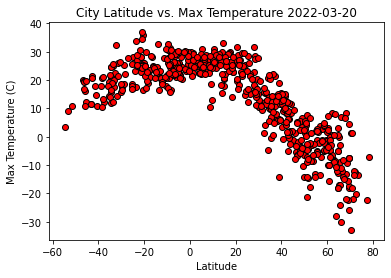

In [82]:
x = weather_df["Latitude"]
y = weather_df["Max Temp"]
plt.title(f"City Latitude vs. Max Temperature {today}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.scatter(x, y, marker = "o", facecolors = "red", edgecolors = "black")
plt.savefig('../output_data/latitude_temp_plot.png')
plt.show()

## Latitude vs. Humidity Plot

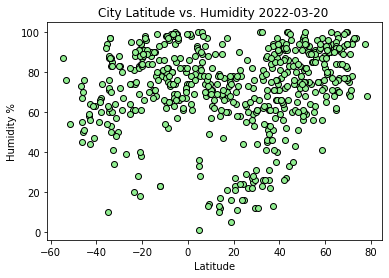

In [83]:
x = weather_df["Latitude"]
y = weather_df["Humidity"]
plt.title(f"City Latitude vs. Humidity {today} ")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.scatter(x, y, marker = "o", facecolors = "lightgreen", edgecolors = "black")
plt.savefig('../output_data/Lat_Humidity_plot.png')
plt.show()

## Latitude vs. Cloudiness Plot

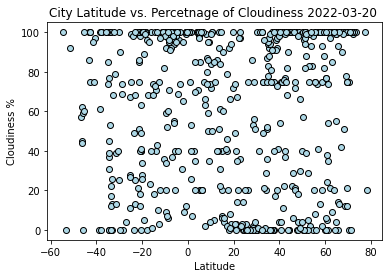

In [84]:
x = weather_df["Latitude"]
y = weather_df["Cloudiness"]
plt.title(f"City Latitude vs. Percetnage of Cloudiness {today} ")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.scatter(x, y, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.savefig('../output_data/Lat_Cloudiness_plot.png')
plt.show()

## Latitude vs. Wind Speed Plot

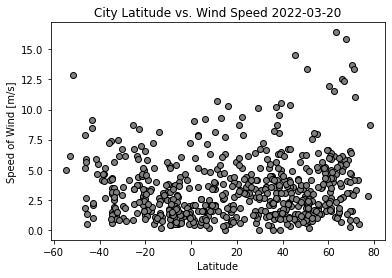

In [85]:
x = weather_df["Latitude"]
y = weather_df["Wind Speed"]
plt.title(f"City Latitude vs. Wind Speed {today}")
plt.xlabel("Latitude")
plt.ylabel("Speed of Wind [m/s]")
plt.scatter(x, y, marker = "o", facecolors = "grey", edgecolors = "black")
plt.savefig('../output_data/Lat_wind_plot.png')
plt.show()

## Linear Regression

In [86]:
#Define new dataframes for northern (latitude >0) and southern (latitude <0) hemispheres
north_hemi_df = weather_df.loc[weather_df['Latitude']>0, :]
north_hemi_df.head()

south_hemi_df =  weather_df.loc[weather_df['Latitude']<0, :]
#south_hemi_df.head()
north_hemi_df.head()

,City,City_ID,Latitude,Longitutde,Country,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Albany,5106841,42.6001,-73.9662,US,12.07,91,77,2.28,2022-03-20 02:53:07
1,Cherskiy,2126199,68.7500,161.3000,RU,-9.20,83,12,5.80,2022-03-20 02:43:47
2,Vardø,777019,70.3705,31.1107,NO,1.37,69,75,13.67,2022-03-20 02:49:12
3,Adrar,2381972,20.5022,-10.0711,MR,19.82,23,49,3.83,2022-03-20 02:43:49
6,Puerto Madero,3520989,14.7208,-92.4215,MX,26.11,89,20,0.00,2022-03-20 02:43:51


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between the Nothern Hemiphsare Latitude and Temperature is ~ -0.88
The r-squared value is 0.7806132122606507


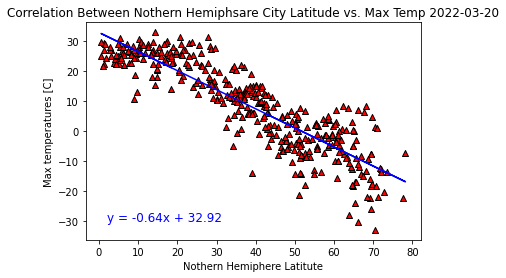

In [87]:
x_value = north_hemi_df['Latitude']
y_value = north_hemi_df['Max Temp']

##Correlation coefficient
corr_coeff = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
reg_line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker="^", color = "red", edgecolors = "black")
plt.plot(x_value, regress_values,"b")
plt.annotate(reg_line_equation,(2,-30),fontsize = 12,color = "blue")
plt.xlabel("Nothern Hemiphere Latitute")
plt.ylabel("Max temperatures [C]")
plt.title(f"Correlation Between Nothern Hemiphsare City Latitude vs. Max Temp {today}")

print(f'The correlation between the Nothern Hemiphsare Latitude and Temperature is ~ {round(corr_coeff[0],2)}')
print(f'The r-squared value is {rvalue**2}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between the Southern Hemisphare Latitude and Temperature is ~ 0.59
The r-squared value is 0.3457128764752144


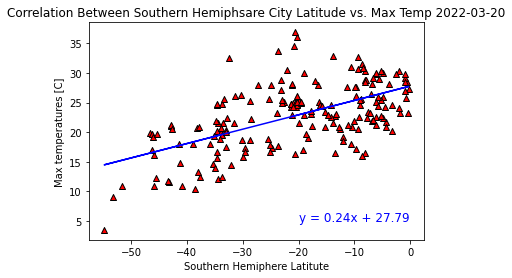

In [88]:
x_value = south_hemi_df['Latitude']
y_value = south_hemi_df['Max Temp']

##Correlation coefficient
corr_coeff = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
reg_line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker="^", color = "red", edgecolors = "black")
plt.plot(x_value, regress_values,"b")
plt.annotate(reg_line_equation,(-20,5),fontsize = 12,color = "blue")
plt.xlabel("Southern Hemiphere Latitute")
plt.ylabel("Max temperatures [C]")
plt.title(f"Correlation Between Southern Hemiphsare City Latitude vs. Max Temp {today}")

print(f'The correlation between the Southern Hemisphare Latitude and Temperature is ~ {round(corr_coeff[0],2)}')
print(f'The r-squared value is {rvalue**2}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between the Nothern Hemipshare Latitude and Humidity is ~ 0.33
The r-squared value is 0.10659574891475376


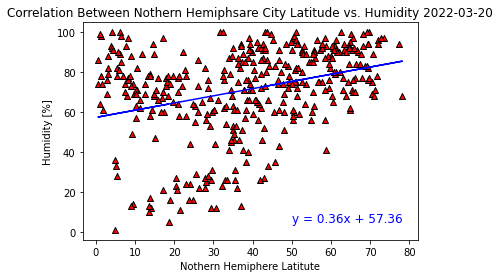

In [89]:
x_value = north_hemi_df['Latitude']
y_value = north_hemi_df['Humidity']

##Correlation coefficient
corr_coeff = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
reg_line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker="^", color = "red", edgecolors = "black")
plt.plot(x_value, regress_values,"b")
plt.annotate(reg_line_equation,(50,5),fontsize = 12,color = "blue")
plt.xlabel("Nothern Hemiphere Latitute")
plt.ylabel("Humidity [%]")
plt.title(f"Correlation Between Nothern Hemiphsare City Latitude vs. Humidity {today}")

print(f'The correlation between the Nothern Hemipshare Latitude and Humidity is ~ {round(corr_coeff[0],2)}')
print(f'The r-squared value is {rvalue**2}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between the Southern Hemipshare Latitude and Humidity is ~ 0.3
The r-squared value is 0.09244536087455367


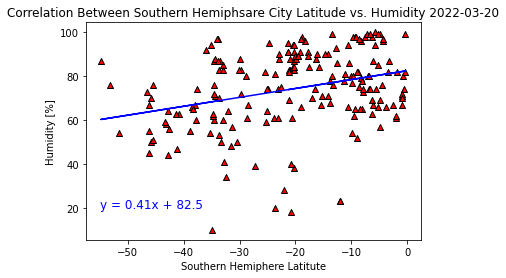

In [90]:
x_value = south_hemi_df['Latitude']
y_value = south_hemi_df['Humidity']

##Correlation coefficient
corr_coeff = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
reg_line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker="^", color = "red", edgecolors = "black")
plt.plot(x_value, regress_values,"b")
plt.annotate(reg_line_equation,(-55,20),fontsize = 12,color = "blue")
plt.xlabel("Southern Hemiphere Latitute")
plt.ylabel("Humidity [%]")
plt.title(f"Correlation Between Southern Hemiphsare City Latitude vs. Humidity {today}")

print(f'The correlation between the Southern Hemipshare Latitude and Humidity is ~ {round(corr_coeff[0],2)}')
print(f'The r-squared value is {rvalue**2}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between the Nothern Hemipshare Latitude and Cloudiness is ~ 0.14
The r-squared value is 0.018874781764062258


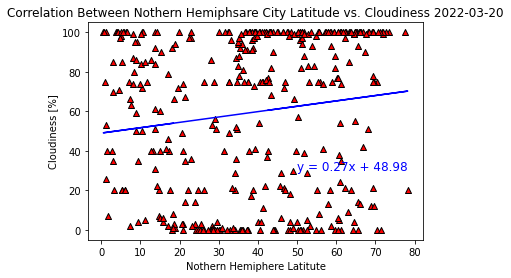

In [91]:
x_value = north_hemi_df['Latitude']
y_value = north_hemi_df['Cloudiness']

##Correlation coefficient
corr_coeff = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
reg_line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker="^", color = "red", edgecolors = "black")
plt.plot(x_value, regress_values,"b")
plt.annotate(reg_line_equation,(50,30), fontsize = 12,color = "blue")
plt.xlabel("Nothern Hemiphere Latitute")
plt.ylabel("Cloudiness [%]")
plt.title(f"Correlation Between Nothern Hemiphsare City Latitude vs. Cloudiness {today}")

print(f'The correlation between the Nothern Hemipshare Latitude and Cloudiness is ~ {round(corr_coeff[0],2)}')
print(f'The r-squared value is {rvalue**2}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between the Southern Hemipshare Latitude and Cloudiness is ~ 0.2
The r-squared value is 0.038155539612393694


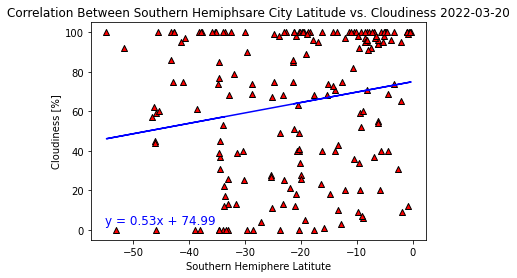

In [92]:
x_value = south_hemi_df['Latitude']
y_value = south_hemi_df['Cloudiness']

##Correlation coefficient
corr_coeff = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
reg_line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker="^", color = "red", edgecolors = "black")
plt.plot(x_value, regress_values,"b")
plt.annotate(reg_line_equation,(-55,3),fontsize = 12,color = "blue")
plt.xlabel("Southern Hemiphere Latitute")
plt.ylabel("Cloudiness [%]")
plt.title(f"Correlation Between Southern Hemiphsare City Latitude vs. Cloudiness {today}")

print(f'The correlation between the Southern Hemipshare Latitude and Cloudiness is ~ {round(corr_coeff[0],2)}')
print(f'The r-squared value is {rvalue**2}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between the Nothern Hemipshare Latitude and Wind Speed is ~ 0.15
The r-squared value is 0.023783628291643894


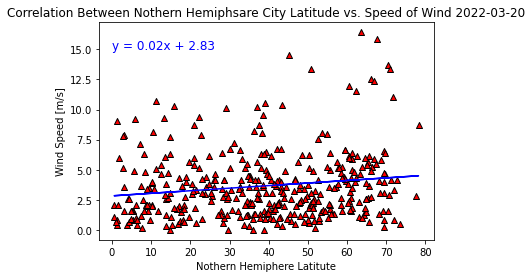

In [93]:
x_value = north_hemi_df['Latitude']
y_value = north_hemi_df['Wind Speed']

##Correlation coefficient
corr_coeff = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
reg_line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker="^", color = "red", edgecolors = "black")
plt.plot(x_value, regress_values,"b")
plt.annotate(reg_line_equation,(0,15), fontsize = 12,color = "blue")
plt.xlabel("Nothern Hemiphere Latitute")
plt.ylabel("Wind Speed [m/s]")
plt.title(f"Correlation Between Nothern Hemiphsare City Latitude vs. Speed of Wind {today}")

print(f'The correlation between the Nothern Hemipshare Latitude and Wind Speed is ~ {round(corr_coeff[0],2)}')
print(f'The r-squared value is {rvalue**2}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between the Southern Hemipshare Latitude and Wind Speed is ~ -0.35
The r-squared value is 0.12108086428107559


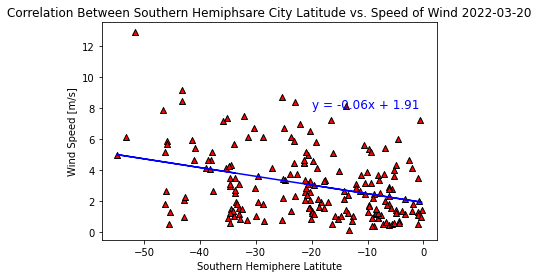

In [94]:
x_value = south_hemi_df['Latitude']
y_value = south_hemi_df['Wind Speed']

##Correlation coefficient
corr_coeff = st.pearsonr(x_value, y_value)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
reg_line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_value, y_value, marker="^", color = "red", edgecolors = "black")
plt.plot(x_value, regress_values,"b")
plt.annotate(reg_line_equation,(-20,8),fontsize = 12,color = "blue")
plt.xlabel("Southern Hemiphere Latitute")
plt.ylabel("Wind Speed [m/s]")
plt.title(f"Correlation Between Southern Hemiphsare City Latitude vs. Speed of Wind {today}")

print(f'The correlation between the Southern Hemipshare Latitude and Wind Speed is ~ {round(corr_coeff[0],2)}')
print(f'The r-squared value is {rvalue**2}')

#### Observations:
#1 There is a trend for positive and negative correlation for northern and southern hemiphasre respectively, however both correlation values are 0.15 and -0.35, which discriminates any siginificant correlation.\
#2 Similarily there is no correlation between the distance from the Equator and cloudiness or humidity \
#3 There is more correlation between the position of the city in respect to the Equator when it comes to temperature. Both correlations equal to -0.88 aqnd 0.59.
